In [4]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [5]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [6]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

caixabank = df[df['empresa'] == 'Caixabank']

caixabank.shape

(1325, 10)

In [7]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

caixabank = caixabank [['date','open','high','low','close','adj close']]

caixabank.shape

(1325, 6)

In [8]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

caixabank['date'] = pd.to_datetime(caixabank['date'], format="%Y-%m-%d")

caixabank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 13925 to 15249
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [9]:
# Paso 5: Ordenar el DF por fecha

caixabank.sort_values(by='date',ascending= True, inplace=True)

caixabank.head()

,date,open,high,low,close,adj close
14810,2019-01-02,3.120,3.150,3.065,3.129,2.562721
14808,2019-01-03,3.127,3.171,3.107,3.127,2.561083
14807,2019-01-04,3.169,3.252,3.147,3.247,2.659365
14585,2019-01-07,3.257,3.272,3.216,3.266,2.674927
14806,2019-01-08,3.271,3.294,3.235,3.272,2.679841


In [10]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

caixabank = caixabank[(caixabank['date'] >= fecha_inicio) & (caixabank['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

caixabank.shape

(812, 6)

In [11]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=caixabank['date'].min(), end=caixabank['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

caixabank = caixabank.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

caixabank = caixabank.rename(columns={'index': 'date'})


In [12]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

caixabank.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,2.120,2.147,2.090,2.129,1.880835
1,2021-01-05,2.117,2.148,2.105,2.134,1.885253
2,2021-01-06,2.164,2.286,2.157,2.255,1.992149
3,2021-01-07,2.270,2.360,2.224,2.340,2.067240
4,2021-01-08,2.369,2.369,2.319,2.341,2.068124
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,2.321,2.357,2.282,2.296,2.028369
8,2021-01-12,2.315,2.381,2.313,2.362,2.086676
9,2021-01-13,2.350,2.366,2.339,2.343,2.069891


In [13]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

caixabank = caixabank.fillna(method='ffill')

In [14]:
# Paso 10: Comprobar que se han introducido los valores correctamente


caixabank.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,2.120,2.147,2.090,2.129,1.880835
1,2021-01-05,2.117,2.148,2.105,2.134,1.885253
2,2021-01-06,2.164,2.286,2.157,2.255,1.992149
3,2021-01-07,2.270,2.360,2.224,2.340,2.067240
4,2021-01-08,2.369,2.369,2.319,2.341,2.068124
5,2021-01-09,2.369,2.369,2.319,2.341,2.068124
6,2021-01-10,2.369,2.369,2.319,2.341,2.068124
7,2021-01-11,2.321,2.357,2.282,2.296,2.028369
8,2021-01-12,2.315,2.381,2.313,2.362,2.086676
9,2021-01-13,2.350,2.366,2.339,2.343,2.069891


In [15]:
# Paso 11: Establecer columna 'date' como índice para modelo

caixabank = caixabank.set_index('date')

caixabank.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,2.120,2.147,2.090,2.129,1.880835
2021-01-05,2.117,2.148,2.105,2.134,1.885253
2021-01-06,2.164,2.286,2.157,2.255,1.992149
2021-01-07,2.270,2.360,2.224,2.340,2.067240
2021-01-08,2.369,2.369,2.319,2.341,2.068124
2021-01-09,2.369,2.369,2.319,2.341,2.068124
2021-01-10,2.369,2.369,2.319,2.341,2.068124
2021-01-11,2.321,2.357,2.282,2.296,2.028369
2021-01-12,2.315,2.381,2.313,2.362,2.086676


In [16]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

caixabank.index = pd.DatetimeIndex(caixabank.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

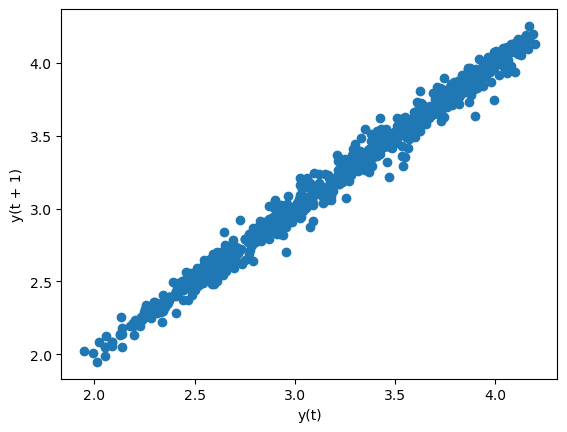

In [17]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(caixabank.close)

In [18]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [19]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = caixabank.close[:-10], caixabank.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [20]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [21]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(caixabank.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    4.097509
2024-02-22    4.095030
2024-02-23    4.092562
2024-02-24    4.090106
2024-02-25    4.087661
2024-02-26    4.085227
2024-02-27    4.082804
2024-02-28    4.080392
2024-02-29    4.077992
2024-03-01    4.075602
Freq: D, dtype: float64

In [22]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    4.099
2024-02-22    4.087
2024-02-23    4.104
2024-02-24    4.104
2024-02-25    4.104
2024-02-26    4.144
2024-02-27    4.169
2024-02-28    4.167
2024-02-29    4.170
2024-03-01    4.254
Freq: D, Name: close, dtype: float64

In [23]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.055317405119006936

In [24]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,4.099,4.097509,-0.001491
2024-02-22,4.087,4.095030,0.008030
2024-02-23,4.104,4.092562,-0.011438
2024-02-24,4.104,4.090106,-0.013894
2024-02-25,4.104,4.087661,-0.016339
2024-02-26,4.144,4.085227,-0.058773
2024-02-27,4.169,4.082804,-0.086196
2024-02-28,4.167,4.080392,-0.086608
2024-02-29,4.170,4.077992,-0.092008
2024-03-01,4.254,4.075602,-0.178398
